In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display
import warnings
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark") 
sns.set_palette("muted") 
import chardet
%matplotlib inline  

In [10]:
MRegularSeasonCompactResults = pd.read_csv('../../data/MRegularSeasonCompactResults.csv')
WRegularSeasonCompactResults = pd.read_csv('../../data/WRegularSeasonCompactResults.csv')
MRegularSeasonDetailedResults = pd.read_csv('../../data/MRegularSeasonDetailedResults.csv')
WRegularSeasonDetailedResults = pd.read_csv('../../data/WRegularSeasonDetailedResults.csv')
MNCAATourneyCompactResults = pd.read_csv('../../data/MNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults = pd.read_csv('../../data/WNCAATourneyCompactResults.csv')
MNCAATourneyDetailedResults = pd.read_csv('../../data/MNCAATourneyDetailedResults.csv') 
WNCAATourneyDetailedResults = pd.read_csv('../../data/WNCAATourneyDetailedResults.csv')
MNCAATourneySeeds = pd.read_csv('../../data/MNCAATourneySeeds.csv')
WNCAATourneySeeds = pd.read_csv('../../data/WNCAATourneySeeds.csv')
MGameCities = pd.read_csv('../../data/MGameCities.csv') 
WGameCities = pd.read_csv('../../data/WGameCities.csv')
MSeasons = pd.read_csv('../../data/MSeasons.csv') 
WSeasons = pd.read_csv('../../data/WSeasons.csv')
MTeams = pd.read_csv('../../data/MTeams.csv') 
WTeams = pd.read_csv('../../data/WTeams.csv') 

# Getting summary statistics  

In [11]:
def display_summary_statistics(mens_df, womens_df): 
    for gender, df in zip(['Mens', 'Womens'], [mens_df, womens_df]):
        print(f"===== {gender} Data Summary =====")
        
        # Basic info
        print(f"\nBasic Info for {gender}:")
        df.info()
        
        # Descriptive statistics
        print(f"\nDescriptive Statistics for {gender}:")
        print(df.describe())
        
        # First 10 rows
        print(f"\nFirst 10 Rows of {gender} Data:")
        print(df.head(10))
        
        # Check for missing values
        print(f"\nMissing Values for {gender}:")
        print(df.isnull().sum())
        
        print("="*50, "\n")  


In [12]:
display_summary_statistics(MRegularSeasonDetailedResults, WRegularSeasonDetailedResults)

===== Mens Data Summary =====

Basic Info for Mens:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118449 entries, 0 to 118448
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   118449 non-null  int64 
 1   DayNum   118449 non-null  int64 
 2   WTeamID  118449 non-null  int64 
 3   WScore   118449 non-null  int64 
 4   LTeamID  118449 non-null  int64 
 5   LScore   118449 non-null  int64 
 6   WLoc     118449 non-null  object
 7   NumOT    118449 non-null  int64 
 8   WFGM     118449 non-null  int64 
 9   WFGA     118449 non-null  int64 
 10  WFGM3    118449 non-null  int64 
 11  WFGA3    118449 non-null  int64 
 12  WFTM     118449 non-null  int64 
 13  WFTA     118449 non-null  int64 
 14  WOR      118449 non-null  int64 
 15  WDR      118449 non-null  int64 
 16  WAst     118449 non-null  int64 
 17  WTO      118449 non-null  int64 
 18  WStl     118449 non-null  int64 
 19  WBlk     118449 non-null  int64 
 

In [13]:
display_summary_statistics(MNCAATourneyDetailedResults, WNCAATourneyDetailedResults)

===== Mens Data Summary =====

Basic Info for Mens:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   1382 non-null   int64 
 1   DayNum   1382 non-null   int64 
 2   WTeamID  1382 non-null   int64 
 3   WScore   1382 non-null   int64 
 4   LTeamID  1382 non-null   int64 
 5   LScore   1382 non-null   int64 
 6   WLoc     1382 non-null   object
 7   NumOT    1382 non-null   int64 
 8   WFGM     1382 non-null   int64 
 9   WFGA     1382 non-null   int64 
 10  WFGM3    1382 non-null   int64 
 11  WFGA3    1382 non-null   int64 
 12  WFTM     1382 non-null   int64 
 13  WFTA     1382 non-null   int64 
 14  WOR      1382 non-null   int64 
 15  WDR      1382 non-null   int64 
 16  WAst     1382 non-null   int64 
 17  WTO      1382 non-null   int64 
 18  WStl     1382 non-null   int64 
 19  WBlk     1382 non-null   int64 
 20  WPF      1382 non-null

# Win margin distributions (higher STD means our MAE/MSE can be higher)

#### Takeaway: highly skewed right (most games are pretty close)

In [14]:
def win_margin(df, df_name):
  df["WinMargin"] = df["WScore"] - df["LScore"]
  plt.figure(figsize=(10, 5))
  sns.histplot(df["WinMargin"], bins=30, kde=True, color="green")
  plt.xlabel("Winning Margin")
  plt.ylabel("Frequency")
  plt.title(f"Distribution of Win Margins for {df_name}")
  plt.show()


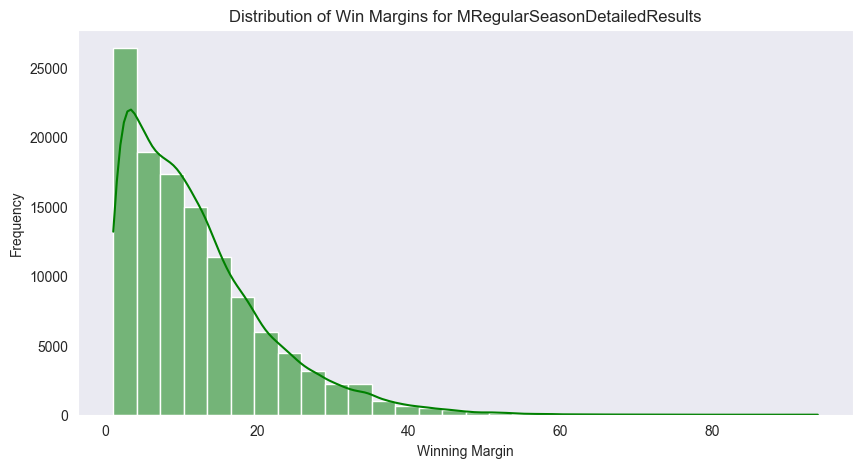

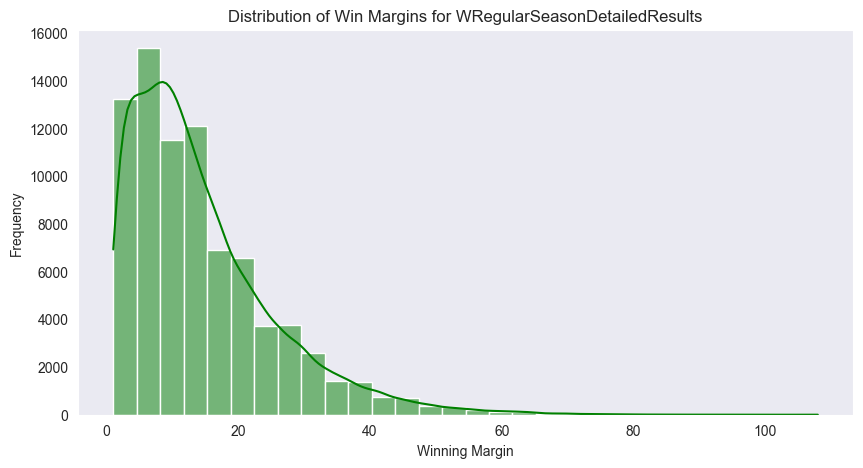

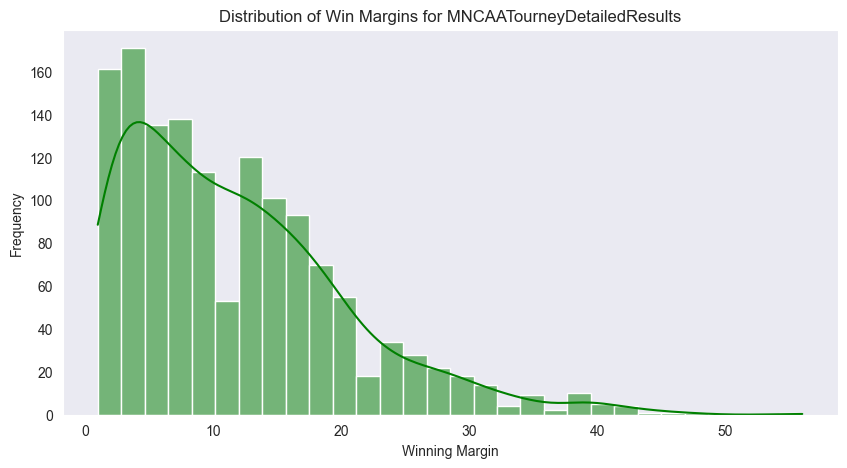

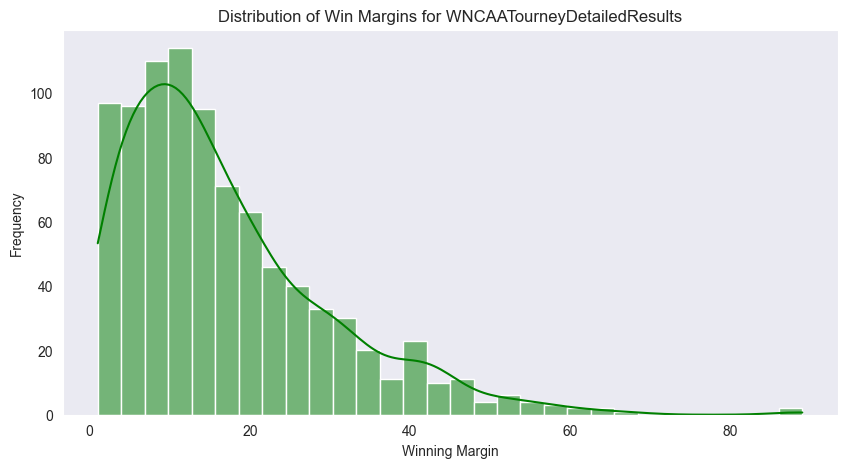

In [15]:
dfs = {
    "MRegularSeasonDetailedResults": MRegularSeasonDetailedResults,
    "WRegularSeasonDetailedResults": WRegularSeasonDetailedResults,
    "MNCAATourneyDetailedResults": MNCAATourneyDetailedResults,
    "WNCAATourneyDetailedResults": WNCAATourneyDetailedResults
}

for name, df in dfs.items():
    win_margin(df, name)  


# Wins by location

### Takeaway: home court advantage does in fact matter, but shouldn't be taken into account for tourney (bc "home court" just means a higher seed ---> location is neutral)

In [16]:
def wins_by_location(df, df_name):
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=df["WLoc"], y=df["WinMargin"], palette="coolwarm")
  plt.legend()
  plt.xlabel(f"Winning team point margin by location for {df_name}")
  plt.ylabel("Winning Score")
  plt.title("Winning Scores by Game Location")
  plt.show()

/var/folders/fg/_cm9z0lx34b9zrpmj_h8s3q80000gn/T/ipykernel_64285/2409621279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["WLoc"], y=df["WinMargin"], palette="coolwarm")
/var/folders/fg/_cm9z0lx34b9zrpmj_h8s3q80000gn/T/ipykernel_64285/2409621279.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


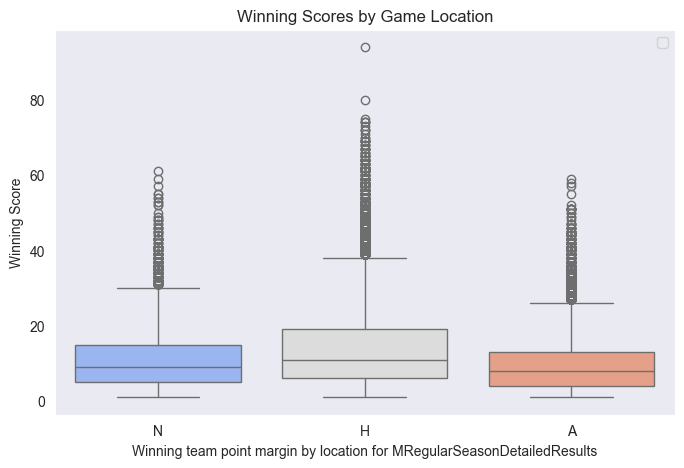

/var/folders/fg/_cm9z0lx34b9zrpmj_h8s3q80000gn/T/ipykernel_64285/2409621279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["WLoc"], y=df["WinMargin"], palette="coolwarm")
/var/folders/fg/_cm9z0lx34b9zrpmj_h8s3q80000gn/T/ipykernel_64285/2409621279.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


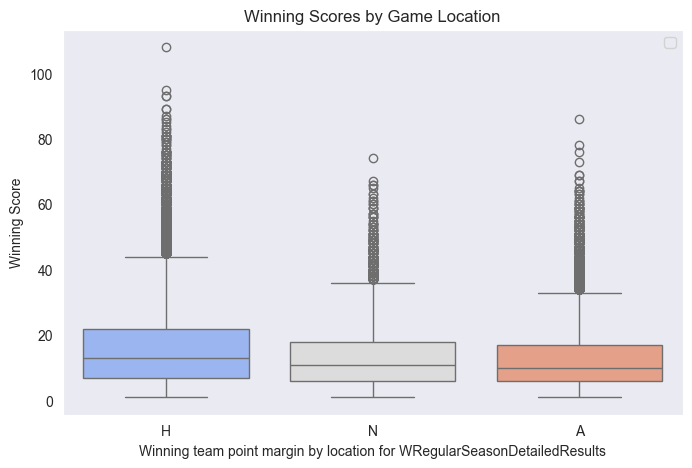

In [17]:
for name, df in dfs.items():
    if name == "MRegularSeasonDetailedResults" or name == "WRegularSeasonDetailedResults":
        wins_by_location(df, name)

# Correlation heatmap using new features (difference in stats between winners and losers)

In [18]:
def plot_correlation_heatmap(df, name):
    df['Score_Diff'] = df['WScore'] - df['LScore']
    df['FGM_Diff'] = df['WFGM'] - df['LFGM']
    df['FGA_Diff'] = df['WFGA'] - df['LFGA']
    df['FGM3_Diff'] = df['WFGM3'] - df['LFGM3']
    df['FGA3_Diff'] = df['WFGA3'] - df['LFGA3']
    df['FTM_Diff'] = df['WFTM'] - df['LFTM']
    df['FTA_Diff'] = df['WFTA'] - df['LFTA']
    df['OREB_Diff'] = df['WOR'] - df['LOR']
    df['DREB_Diff'] = df['WDR'] - df['LDR']
    df['AST_Diff'] = df['WAst'] - df['LAst']
    df['TO_Diff'] = df['WTO'] - df['LTO']
    df['STL_Diff'] = df['WStl'] - df['LStl']
    df['BLK_Diff'] = df['WBlk'] - df['LBlk']
    df['PF_Diff'] = df['WPF'] - df['LPF']


    difference_columns = [
    'Score_Diff', 'FGM_Diff', 'FGA_Diff', 'FGM3_Diff', 'FGA3_Diff', 'FTM_Diff',
    'FTA_Diff', 'OREB_Diff', 'DREB_Diff', 'AST_Diff', 'TO_Diff', 'STL_Diff',
    'BLK_Diff', 'PF_Diff'
    ]

    difference_data = df[difference_columns]

    plt.figure(figsize=(20, 20))  
    sns.heatmap(difference_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title(f"Correlation Heatmap of Difference Features for {name}")
    plt.show()

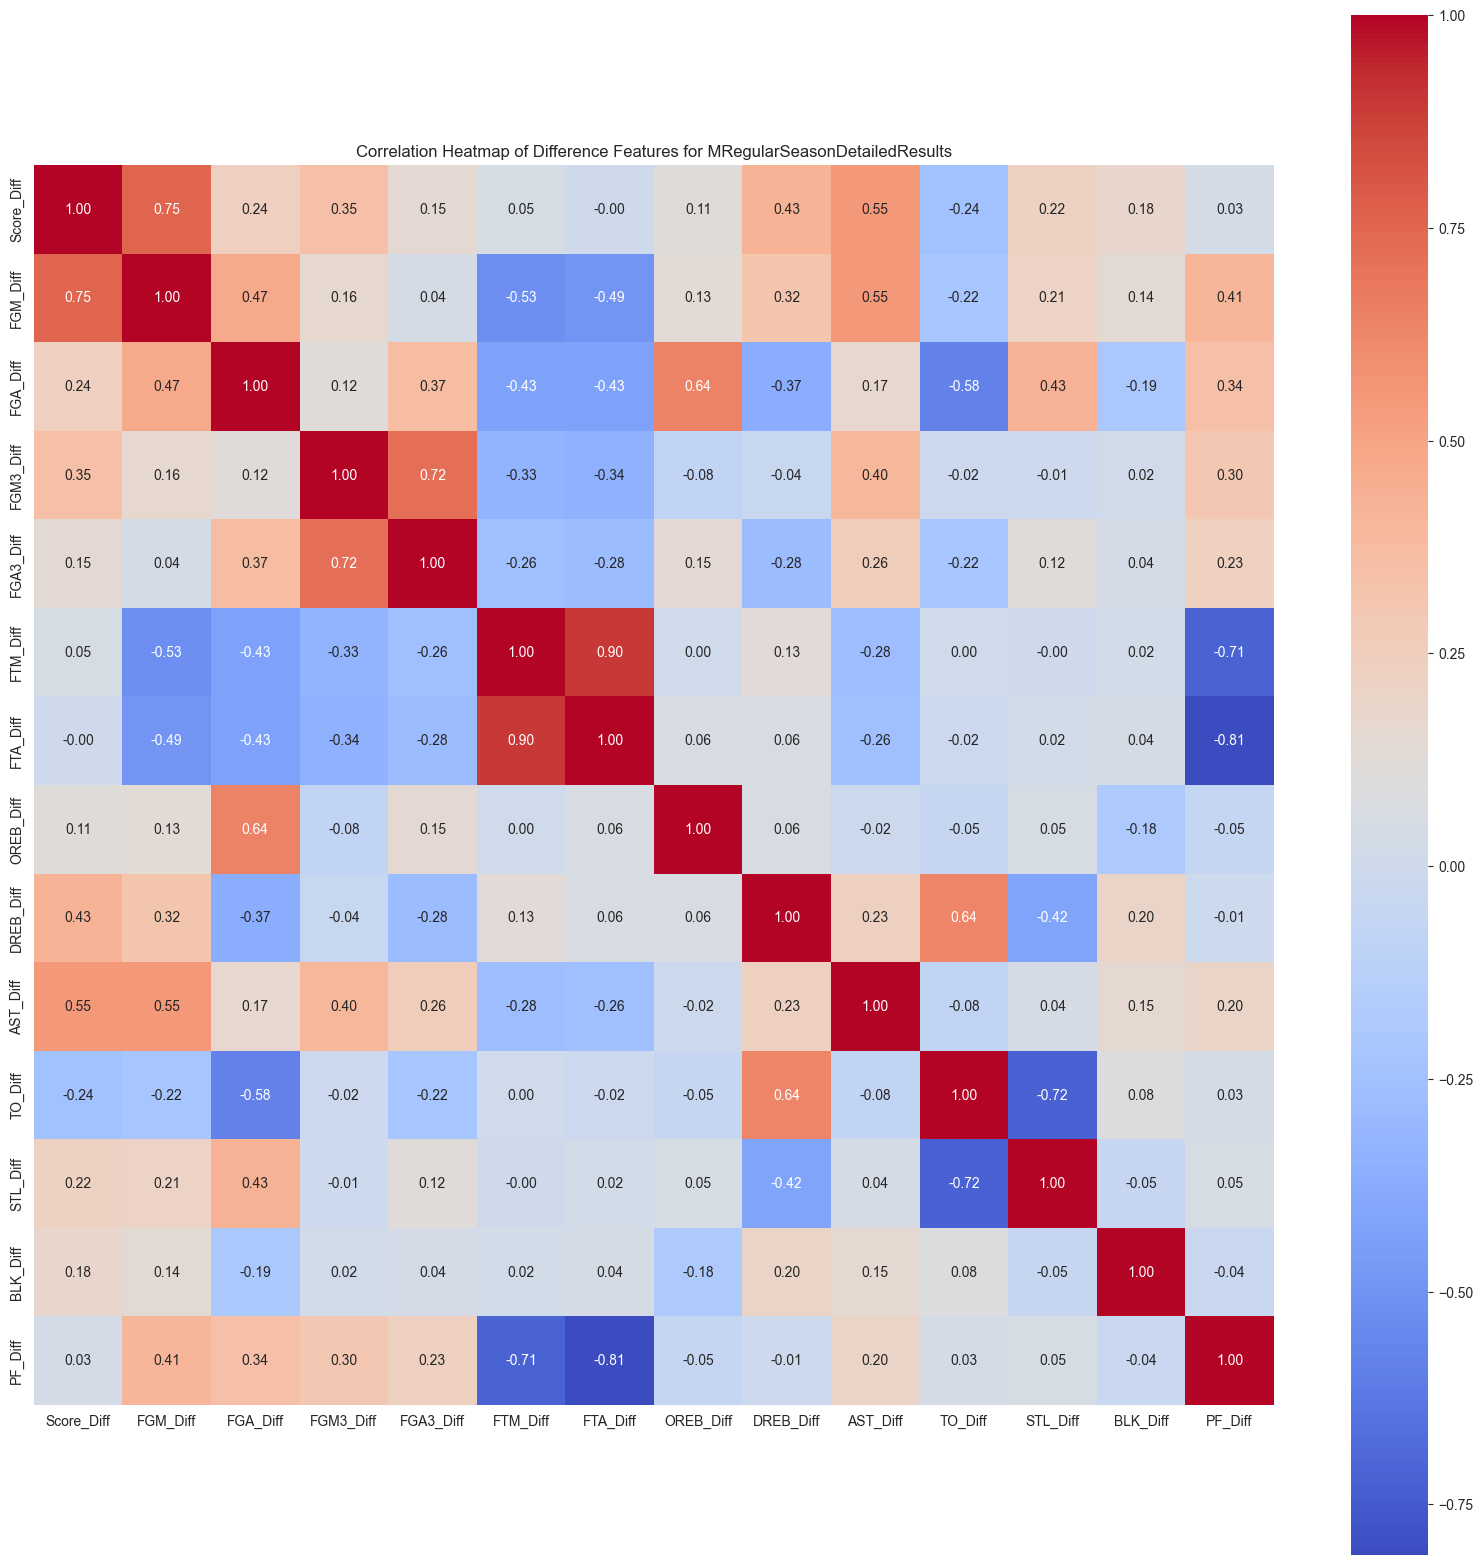

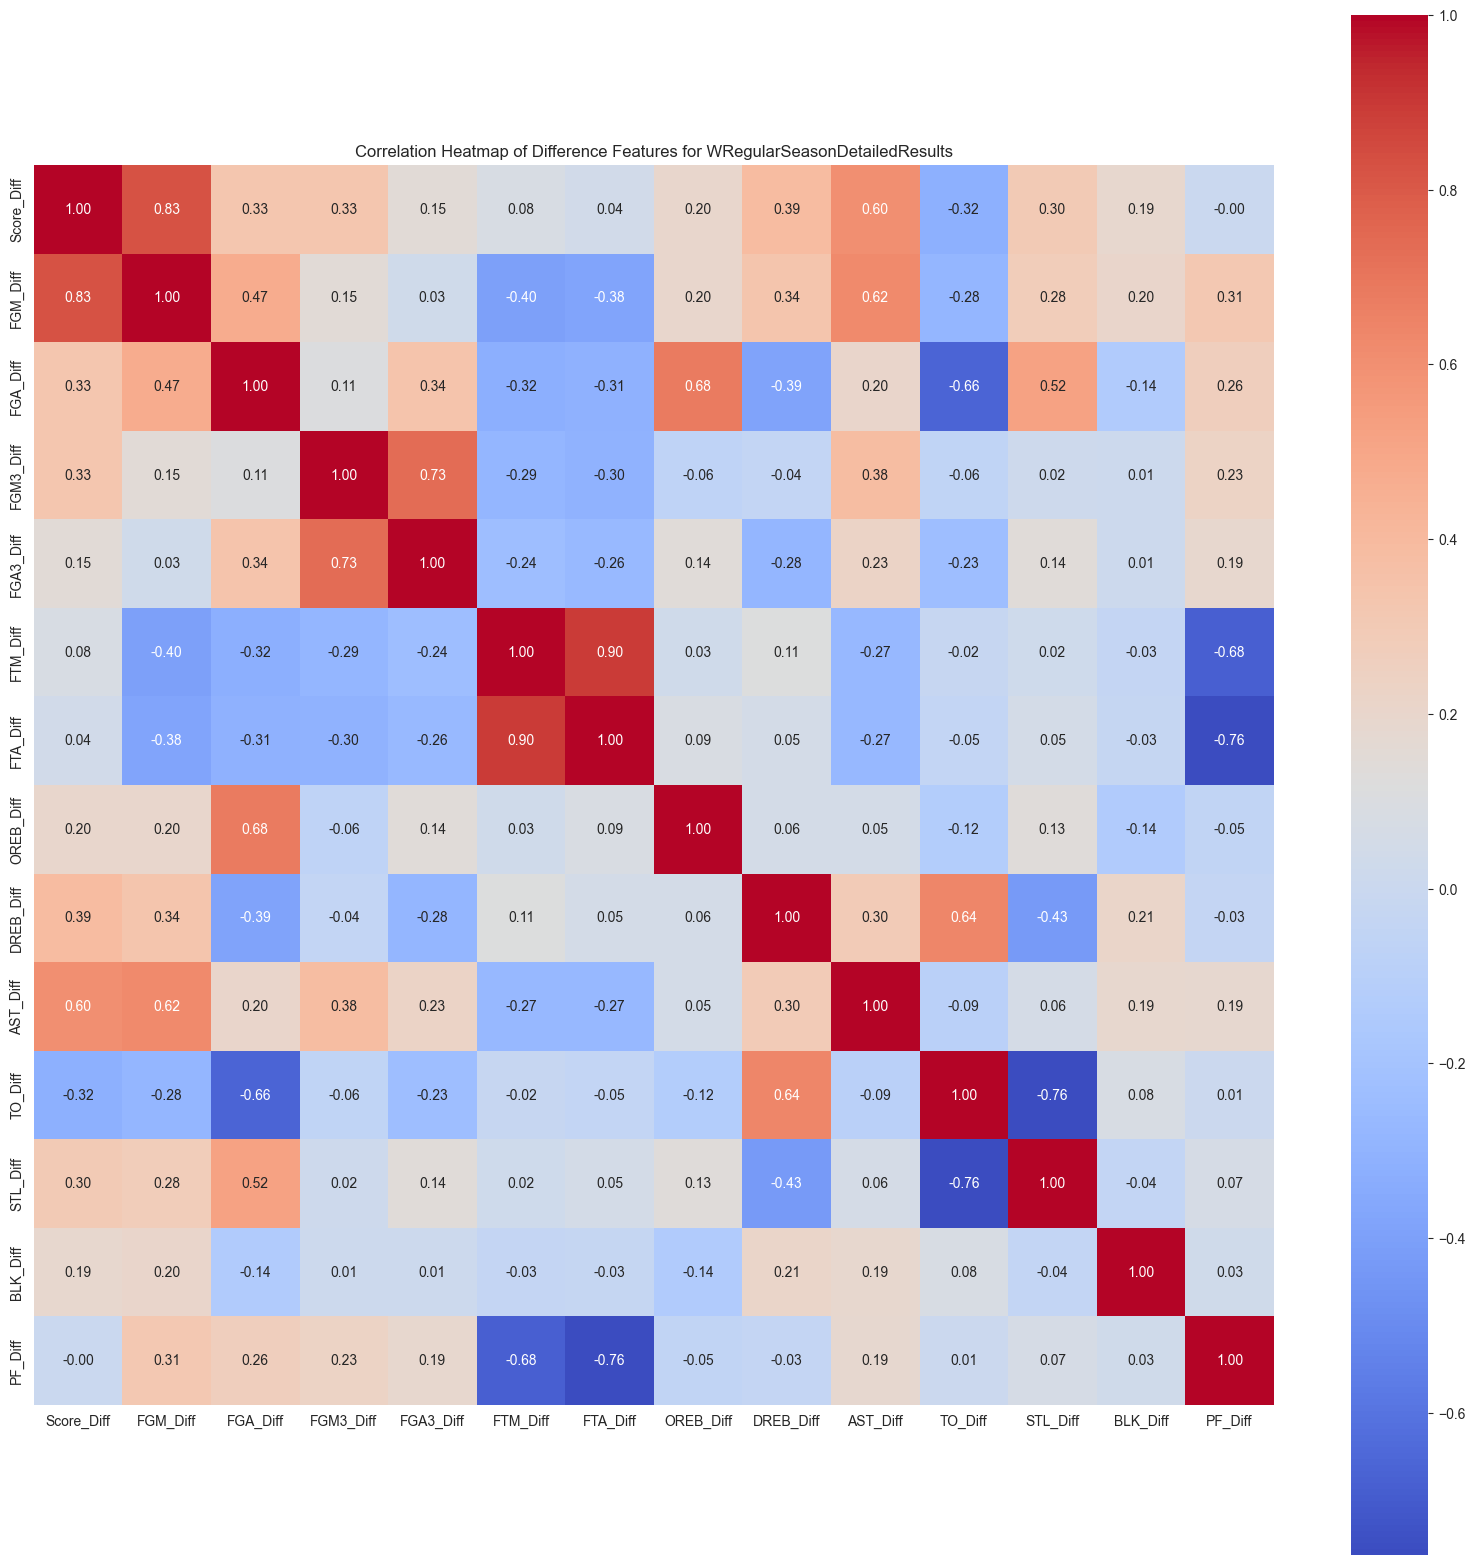

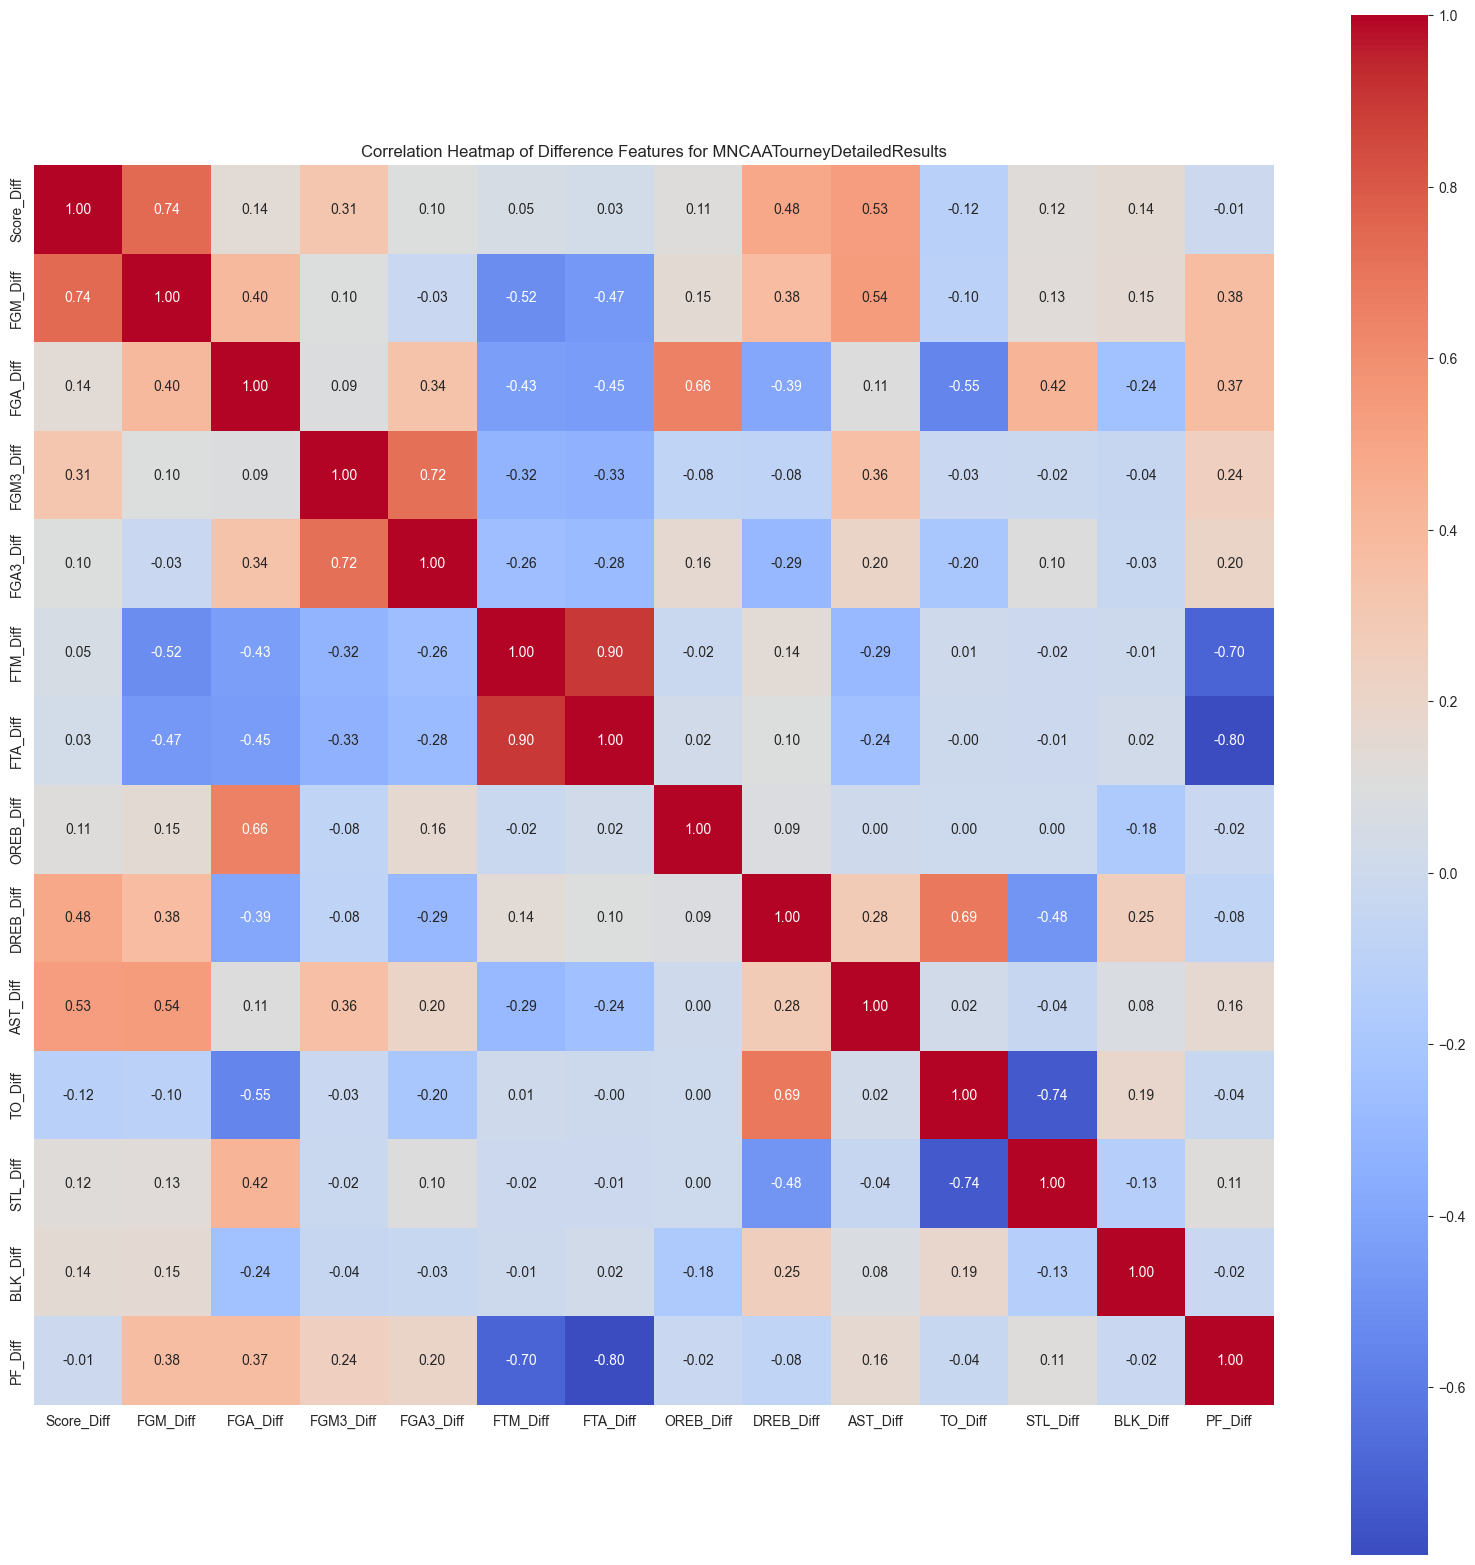

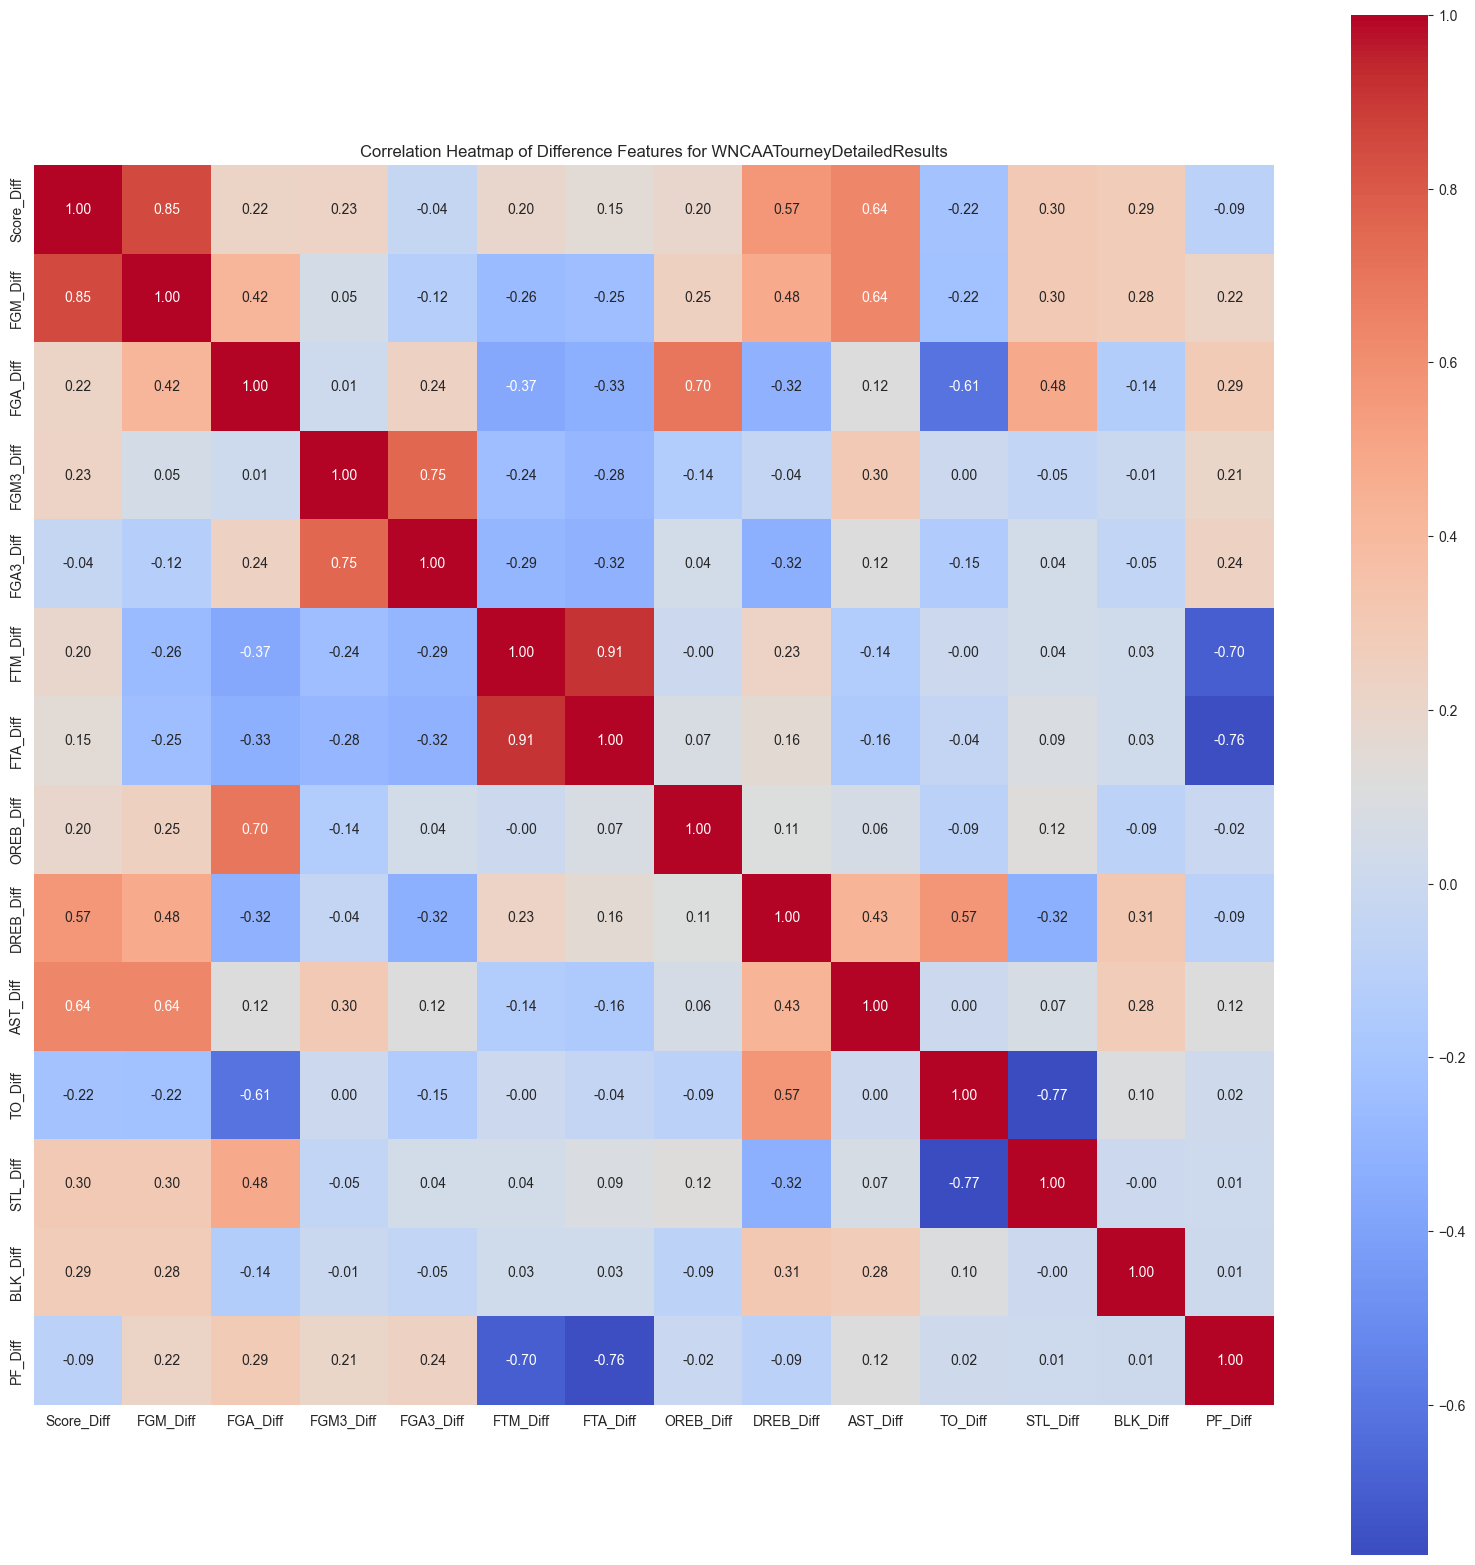

In [19]:
for name, df in dfs.items():
  plot_correlation_heatmap(df, name)

In [20]:
MNCAATourneyDetailedResults.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'WinMargin', 'Score_Diff', 'FGM_Diff', 'FGA_Diff', 'FGM3_Diff',
       'FGA3_Diff', 'FTM_Diff', 'FTA_Diff', 'OREB_Diff', 'DREB_Diff',
       'AST_Diff', 'TO_Diff', 'STL_Diff', 'BLK_Diff', 'PF_Diff'],
      dtype='object')

In [21]:
for gender, df in zip(['Mens', 'Womens'], [MNCAATourneyDetailedResults, WNCAATourneyDetailedResults]):
    print(f"\n{'='*50}")
    print(f"Multivariate Analysis: {gender} NCAA Tourney")
    print(f"{'='*50}\n")

    cols_to_keep = ['WScore', 'LScore', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM','WFTA', 'WOR', 'WDR','WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3','LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']

    # Covariance Matrix
    print(f"\n{'='*50}")
    print("\n Covariance Matrix:")
    covariance_matrix = df[cols_to_keep].cov()
    print(covariance_matrix)

    # 3. Summary Statistics for each team
    print(f"\n{'='*50}")
    print("\n📊 Summary Statistics for each team:")
    winner_stats = df.groupby('WTeamID')[cols_to_keep].mean()
    loser_stats = df.groupby('WTeamID')[cols_to_keep].mean()
    print(f"\n{'='*50}")
    print("\nWinning teams: ")
    print(winner_stats.head())
    print(f"\n{'='*50}")
    print("\nLosing teams: ")
    print(" ------ ")
    print(loser_stats.head())


Multivariate Analysis: Mens NCAA Tourney



 Covariance Matrix:
            WScore      LScore     NumOT       WFGM       WFGA      WFGM3  \
WScore  115.937079   74.123008  0.488963  42.658731  37.100961  13.356509   
LScore   74.123008  107.567236  0.948323  23.287709  26.226828   7.274725   
NumOT     0.488963    0.948323  0.081011   0.163841   0.502324   0.051326   
WFGM     42.658731   23.287709  0.163841  22.710528  21.270130   4.361397   
WFGA     37.100961   26.226828  0.502324  21.270130  52.067642   3.843307   
WFGM3    13.356509    7.274725  0.051326   4.361397   3.843307   9.150820   
WFGA3    13.043835    7.682084  0.188814   3.767006  14.094600  13.031943   
WFTM     17.263108   20.272866  0.109954  -7.123722  -9.282605  -4.517106   
WFTA     21.408064   26.105571  0.191556  -7.855384 -10.655001  -5.424127   
WOR       5.795278    3.553397  0.106278   2.567495  15.818852  -0.545029   
WDR       6.763497   -7.001723  0.071966   3.020894   6.375574  -1.922406   
WAst     27

# Underdogs

In [22]:
underdogs = MNCAATourneyDetailedResults.merge(MNCAATourneySeeds, left_on=["Season", "WTeamID"], right_on=["Season", "TeamID"], how="left")
underdogs["Seed"] = underdogs["Seed"].str.extract("(\d+)").astype(float)

wins_per_team = underdogs.groupby(["Season", "WTeamID", "Seed"]).size().reset_index(name="Wins")
underdogs = wins_per_team[(wins_per_team["Seed"] > 10) & (wins_per_team["Wins"] > 2)]

underdogs = underdogs.merge(MTeams, left_on="WTeamID", right_on="TeamID", how="left")

underdogs.head()

,Season,WTeamID,Seed,Wins,TeamID,TeamName,FirstD1Season,LastD1Season
0,2006,1206,11.0,4,1206,George Mason,1985,2025
1,2011,1433,11.0,5,1433,VCU,1985,2025
2,2013,1247,13.0,3,1247,La Salle,1985,2025
3,2014,1173,11.0,3,1173,Dayton,1985,2025
4,2014,1397,11.0,3,1397,Tennessee,1985,2025


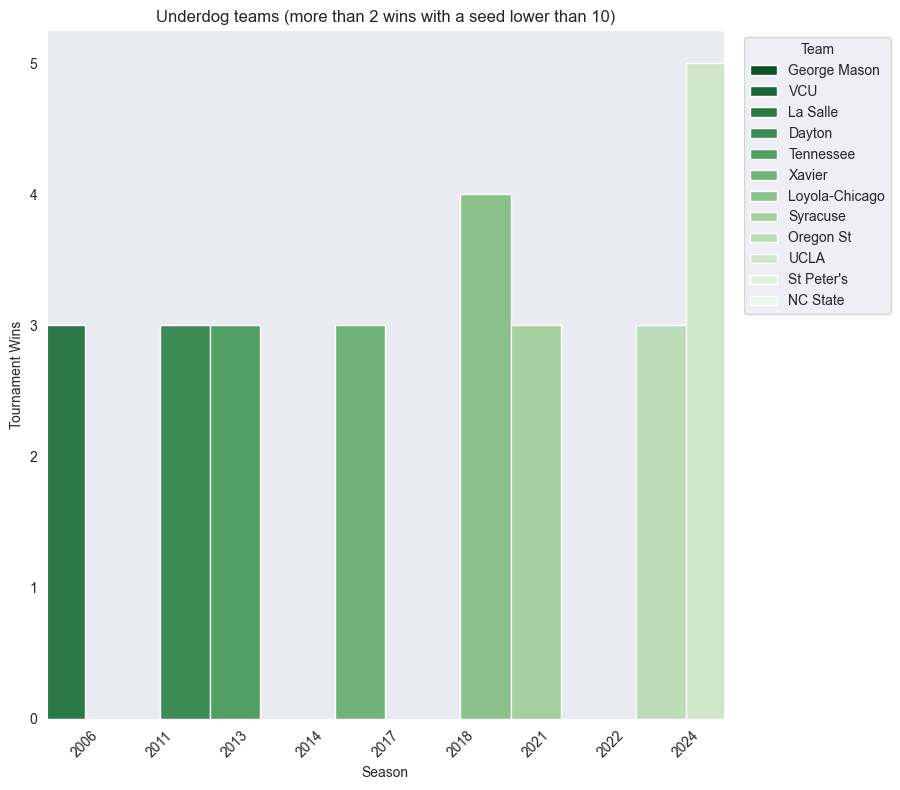

In [23]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(data=underdogs, x="Season", y="Wins", hue="TeamName", palette="Greens_r", dodge=True, width=8)
plt.xlabel("Season")
plt.ylabel("Tournament Wins")
plt.title("Underdog teams (more than 2 wins with a seed lower than 10)")
plt.xticks(rotation=45)
plt.legend(title="Team", bbox_to_anchor=(1.02, 1), loc='upper left')  


plt.tight_layout()
plt.show()